<h1>MDS_Assignment1_B09705039_劉惟恩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams["figure.dpi"] = 100
np.set_printoptions(suppress=True)

<h2> Problem 1

In [2]:
# Read Data
furnace_df = pd.read_csv("MDS_Assignment1_furnace.csv")
display(furnace_df)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.264250,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.684962,-0.406121,-0.687687,0.271886,-0.232472,0.102129,2
616,-0.379487,3.809407,-0.461423,0.409400,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,2.248407,-0.332678,-0.687687,0.271886,4.519156,0.102129,2
617,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-1.023427,1.332042,-0.687687,0.271886,-0.232472,0.102129,2
618,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,3.150982,-1.777067,-0.687687,0.271886,-0.232472,0.102129,2


<h3>(a)

In [3]:
# Multiple Regression
y = furnace_df['grade']

X_ar = np.array(furnace_df.iloc[:, 0:28])
xnames = np.array(furnace_df.columns[0:28])
X = pd.DataFrame(X_ar,columns = xnames)
X = sm.add_constant(X)

olsmod = sm.OLS(y, X)
result = olsmod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.52
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.16e-70
Time:                        23:13:04   Log-Likelihood:                -381.52
No. Observations:                 620   AIC:                             819.0
Df Residuals:                     592   BIC:                             943.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0339      0.018    110.528      0.0

R-squared: 0.495, Adjusted R-squared: 0.472, f0 to f27 is in the result chart.

<h3>(b)

No, it is not a good idea.<br>
There are lots of variables whose p-values > 0.01, which means they may not be statistically significant variables.<br>
The R-square value of this result is 0.495, which means there is around 50% of the variance cannot be explained by this regression model.<br>

By measuring Variance Inflating factor(VIF) > 1 in this model, we can find that multicollinearity problem exists, and this may be a reason why the model doesn't fit well.<br>
Also, since there are lots of non statistically significant variables by using them to create model may cause overfitting problems.

<h3>(c)

In [4]:
# Rank Variables
rank = np.argsort(result.pvalues)
pvalues = result.pvalues
rankedVar = []
rankedPvalues = []
for i in rank:
    rankedVar.append(pvalues.index[i])
    rankedPvalues.append(pvalues[i])

In [5]:
# Display Ranked Data
data1 = {"Ranking" : range(1, 30),
        "Variable" : rankedVar,
        "Pvalue" : rankedPvalues}
df_ranked = pd.DataFrame(data1)
display(df_ranked)

,Ranking,Variable,Pvalue
0,1,const,0.000000e+00
1,2,f18,6.355895e-19
2,3,f2,2.430368e-18
3,4,f14,6.896905e-18
4,5,f15,3.971326e-08
5,6,f9,1.552823e-05
6,7,f22,4.429125e-04
7,8,f17,6.967770e-04
8,9,f25,7.041639e-04
9,10,f6,6.295708e-03


In [6]:
# Display variables with p-values < 0.01
SS_variables = df_ranked.drop(df_ranked[df_ranked.Pvalue > 0.01].index)
display(SS_variables)

,Ranking,Variable,Pvalue
0,1,const,0.000000e+00
1,2,f18,6.355895e-19
2,3,f2,2.430368e-18
3,4,f14,6.896905e-18
4,5,f15,3.971326e-08
5,6,f9,1.552823e-05
6,7,f22,4.429125e-04
7,8,f17,6.967770e-04
8,9,f25,7.041639e-04
9,10,f6,6.295708e-03


<h3>(d)

In [7]:
import statsmodels.stats.outliers_influence as sso
import scipy.stats as stats
import statistics
import math

In [8]:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

In [9]:
# residual analysis
st, data, ss2 = sso.summary_table(result, alpha=0.01)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Normality test:<br>
H0 : Normal distributed<br>
H1 : Not normal distributed

In [10]:
# Normality test
stat, p = stats.shapiro(SD)
print('Shapiro Test: Statistics=%f, p=%f' % (stat, p))

Shapiro Test: Statistics=0.933908, p=0.000000


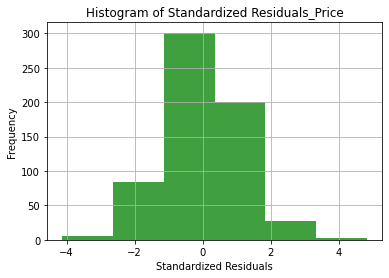

In [11]:
# Distribution histogram
mu = np.mean(SD)
sigma = np.std(SD)
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Price')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

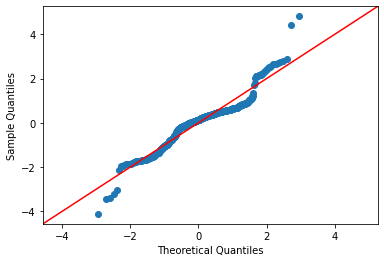

In [12]:
# qqplot
sm.qqplot(SD, line='45')
plt.show()

Since p-value < alpha = 0.01, we reject H0 at significance level at alpha = 0.01.<br>
Also, the qqplot and the histogram implies that it is not normally distributed.<br>

Independence test:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

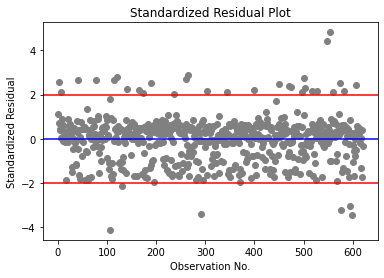

runs =  320
n1 =  310
n2 =  310
runs_exp =  311.0
stan_dev =  12.439839071418033
z =  0.7234820280495862
pval_z =  0.4693837916250403
p_value for Z-statistic=  0.4693837916250403


In [13]:
# Independence test
Id = data[:, 0]
plt.plot(Id, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median) 
print('p_value for Z-statistic= ', Z_pval)

Since n1>20 and n2>20, we can apply run test with normal distribution.<br>
Since p-value > alpha = 0.01, we can not reject H0 at significance level at alpha = 0.01.<br>
There is no evidence to infer the sample is not random selected.

Homogeneity of Variance test:<br>
H0 : Homogeneity of Variance<br>
H1 : Not Homogeneity of Variance

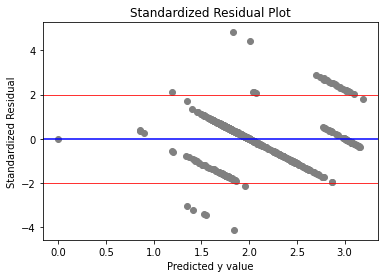

In [14]:
# Homogeneity of Variance test
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

From the plot above, it doesn't satisfy that the variation is constant and the mean is around 0. Thus, we reject H0. The residual doesn't satisfy the condition of homogeneity of variance.

Thus, we can conclude that this result might not be a good model.

<h2>Problem 2

<h3>(1)

In [15]:
# Read file
import numpy as np
import pandas as pd
import csv

file = open('MDS_Assignment1_groceries.csv')
csvreader = csv.reader(file)
rows = []
for row in csvreader:
    rows.append(row)
    
# Extract itemNames
itemNames = []
for i in rows:
    for j in i:
        if j not in itemNames:
            itemNames.append(j)
            
# Get one hot array
itemCount = np.zeros((len(rows), len(itemNames)))
for i in range(len(rows)):
    for j in range(len(rows[i])):
        for k in range(len(itemNames)):
            if rows[i][j] == itemNames[k]:
                itemCount[i][k] = 1
                
# Initialize dataframe
basket = pd.DataFrame(itemCount, columns=itemNames)
basket = basket.astype(bool)

In [16]:
# One hot df
display(basket)

,citrus fruit,semi-finished bread,margarine,ready soups,tropical fruit,yogurt,coffee,whole milk,pip fruit,cream cheese,...,baby food,pudding powder,tidbits,whisky,frozen fruits,bags,cooking chocolate,sound storage medium,kitchen utensil,preservation products
0,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,True,False,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9832,True,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9833,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h3>(2)

In [17]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [18]:
# Build up the frequent items (min_support=0.001)
frequent_itemsets = apriori(basket, min_support=0.001, use_colnames=True)

In [19]:
# Create the rules (set lift > 1)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [20]:
# Set the minimum confidence of 0.15
rules = rules[(rules['confidence'] >= 0.15)]
# Sort rules by support
rules = rules.sort_values(by='support', ascending=False)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
994,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
995,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1004,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
1005,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
624,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157
...,...,...,...,...,...,...,...,...,...
55543,"(pork, yogurt, tropical fruit)",(frozen vegetables),0.002745,0.048094,0.001017,0.370370,7.701041,0.000885,1.511851
55544,"(frozen vegetables, pork)","(tropical fruit, yogurt)",0.006406,0.029283,0.001017,0.158730,5.420525,0.000829,1.153871
5550,"(margarine, brown bread)",(citrus fruit),0.006507,0.082766,0.001017,0.156250,1.887861,0.000478,1.087093
55568,"(frozen vegetables, tropical fruit, yogurt)",(whipped/sour cream),0.003355,0.071683,0.001017,0.303030,4.227380,0.000776,1.331933


In [21]:
# Top 5 rules
rules.iloc[0:5,:]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
994,(whole milk),(other vegetables),0.255516,0.193493,0.074835,0.292877,1.513634,0.025394,1.140548
995,(other vegetables),(whole milk),0.193493,0.255516,0.074835,0.386758,1.513634,0.025394,1.214013
1004,(whole milk),(rolls/buns),0.255516,0.183935,0.056634,0.221647,1.205032,0.009636,1.048452
1005,(rolls/buns),(whole milk),0.183935,0.255516,0.056634,0.307905,1.205032,0.009636,1.075696
624,(whole milk),(yogurt),0.255516,0.139502,0.056024,0.219260,1.571735,0.020379,1.102157


<h3>(3)

As we can see in the Top 5 rules dataframe sorted by support above, a guess of a “story” to interpret the third rule is as to followings:

Rule 3: (whole milk) => (rolls/buns)<br>
Whenever a person buys whole milk, he or she have a high probability to also buy rolls/buns.<br>
Lots of people drink milk in the morning as breakfast or in the afternoon as snacks. However, drinks do not provide enough nutrition and energy for the rest of the day.<br>
To solve this problem, most people usually have rolls/buns whole grains foods together with milk to get more nutrition and energy in reality.<br>
This may be the story behind this association rule "Most people buy rolls/buns after buying milk".<br>

<h3>(4)

Since there are too many rules we will draw the top 10 association rules sorted by support to have a better visualization of the association rule.<br>
The red nodes are itmes (denoted as item names) and blue nodes are rules (denoted as R0, R1, etc.).<br>
e.g. rule 0 : (other vegetables) => (whole milk) An arrow starts from other vegetables to R0 to whole milk.

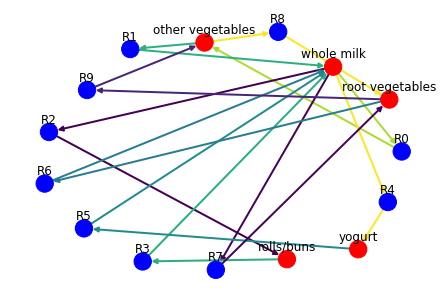

In [22]:
# Draw Network graph
def draw_graph(rules, rules_to_show):
    import networkx as nx 
    G1 = nx.DiGraph()

    color_map=[]
    colors = np.random.rand(rules_to_show)
    strs=[]
    for i in range(rules_to_show):
        strs.append("R" + str(i))

    for i in range (rules_to_show):   
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i], weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('blue')
        else:
            color_map.append('red')


    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.1
    nx.draw_networkx_labels(G1, pos)
    plt.show()
     
draw_graph(rules, 10)

<h2>Problem 3

<h3>(1)

In [23]:
data = {"work station ID": [1, 2, 3, 4, 5],
        "machine amount": [3, 3, 6, 2, 5],
        "proccessing time": [5, 8, 12, 4, 12]}
LLdf = pd.DataFrame(data)
LLdf["TH in float"] = LLdf["machine amount"] / LLdf["proccessing time"]
LLdf["TH in fraction"] = ["3/5", "3/8", "1/2", "1/2", "5/12"]
LLdf

,work station ID,machine amount,proccessing time,TH in float,TH in fraction
0,1,3,5,0.600000,3/5
1,2,3,8,0.375000,3/8
2,3,6,12,0.500000,1/2
3,4,2,4,0.500000,1/2
4,5,5,12,0.416667,5/12


The TH of all work stations are shown in the chart above.<br>
Among the TH values above, work station 2 has the lowest TH, thus we can conclude that work station 2 is the threshold station in this production line.<br>
$r_b = \frac{3}{8}$, $T_0 = 5 + 8 + 12 + 4 + 12 = 41$, $W_0 = \frac{3 \times 41}{8}$.

<h3>(2)

In [24]:
print("Float values for the whole production line:")
print("T0 =", LLdf["proccessing time"].sum())
print("W0 =", 3 * 41 / 8)
print("rb =", 3 / 8)

Float values for the whole production line:
T0 = 41
W0 = 15.375
rb = 0.375


$$ THbest = \begin{cases} \frac{w}{41}, & \text {if w $\leq \frac{3 \times 41}{8}$} \\ \frac{3}{8}, & \text{otherwise} \end{cases} $$
$$ CTbest = \begin{cases} 41, & \text {if w $\leq \frac{3 \times 41}{8}$} \\ \frac{8w}{3}, & \text{otherwise} \end{cases} $$

<h3>(3)

In [25]:
# simulation of WIP(1~50) TH CT
wArr = []
THArr = []
CTArr = []
w0 = 3 * 41 / 8
for w in range(1, 50):
    wArr.append(w)
    if w <= w0:
        TH = w / 41
        CT = 41
    else:
        TH = 3 / 8
        CT = (8 * w) / 3
    THArr.append(TH)
    CTArr.append(CT)

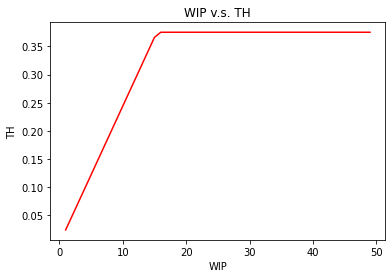

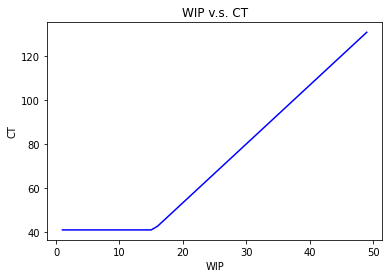

In [26]:
# Plot WIP v.s. TH and WIP v.s. CT with WIP from 1 to 50
import matplotlib.pyplot as plt

# plot for WIP v.s. TH
plt.plot(wArr, THArr, color='red')
plt.xlabel("WIP")
plt.ylabel("TH")
plt.title("WIP v.s. TH")
plt.show()

# plot for WIP v.s. CT
plt.plot(wArr, CTArr, color='blue')
plt.xlabel("WIP")
plt.ylabel("CT")
plt.title("WIP v.s. CT")
plt.show()

References:

(2-4 graph) https://intelligentonlinetools.com/blog/2018/02/10/how-to-create-data-visualization-for-association-rules-in-data-mining/

(1-4 test) statistic class homework answer